In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sympy as sy
import scipy.linalg as la 
import scipy.sparse.linalg as spla
import time 
import matplotlib.pyplot as plt
import cmath
from utils import helper
%matplotlib inline

#### Wilkinson Polynomial

In [2]:
wilkinson = lambda x,roots: np.prod([x-i for i in roots], axis=0)

(-40000000000000.0, 40000000000000.0)

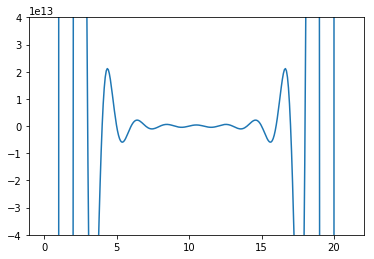

In [3]:
roots = np.arange(1,21)
x = np.linspace(0,21, 300)
y = wilkinson(x,roots)
plt.plot(x,y)
plt.ylim(-4e13, 4e13)

In [4]:
w_coeffs = np.array([1, -210, 20615, -1256850, 53327946, -1672280820,
                    40171771630, -756111184500, 11310276995381,
                    -135585182899530, 1307535010540395,
                    -10142299865511450, 63030812099294896,
                    -311333643161390640, 1206647803780373360,
                    -3599979517947607200, 8037811822645051776,
                    -12870931245150988800, 13803759753640704000,
                    -8752948036761600000, 2432902008176640000])
w_roots = np.arange(1,21)

In [5]:
perturb = np.zeros(21)
perturb[1] = 1e-7
perturb_coeffs = w_coeffs - perturb
perturb_coeffs

array([1.0, -210.0000001, 20615.0, -1256850.0, 53327946.0, -1672280820.0,
       40171771630.0, -756111184500.0, 11310276995381.0,
       -135585182899530.0, 1307535010540395.0, -1.014229986551145e+16,
       6.30308120992949e+16, -3.1133364316139066e+17,
       1.2066478037803732e+18, -3.599979517947607e+18,
       8.037811822645051e+18, -1.2870931245150988e+19,
       1.3803759753640704e+19, -8.7529480367616e+18, 2.43290200817664e+18], dtype=object)

In [6]:
#find the roots using np.roots
perturbed_roots = np.roots(np.poly1d(perturb_coeffs))

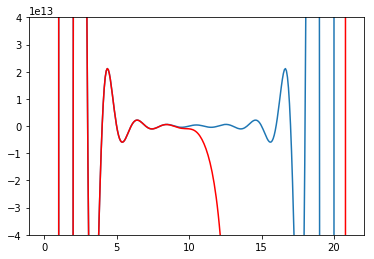

In [7]:
y_perturbed = np.real(wilkinson(x, perturbed_roots))
plt.ylim(-4e13, 4e13)
plt.plot(x, y)
plt.plot(x, y_perturbed, 'r')

In [8]:
#absolute condition number
w_roots = np.sort(w_roots)
perturbed_roots = np.sort(perturbed_roots)
k = la.norm(perturbed_roots-w_roots)/la.norm(perturb)
k

68232816.89269458

In [9]:
# Estimate the absolute condition number in the infinity norm
k = la.norm(perturbed_roots-w_roots, np.inf)/la.norm(perturb, np.inf)
k

28262385.815815903

In [10]:
# Estimate the relative condition number in the infinity norm
k*la.norm(w_coeffs, np.inf)/la.norm(w_roots, np.inf)

1.9506359193311274e+25

### Problem 1. 
Write a Python function that investigates the condition number of the Wilkinson polynomial by doing the following.

1. Perform this experiment:
    Randomly perturb $w(x)$ by replacing each coeffcient $a_i$ with $a_i*r_i$, where $r_i$ is drawn from a normal distribution centered at $1$ with standard deviation $1e -10$.

    Plot the results of 100 such experiments in a single graphic, along with the roots of the unperturbed polynomial $w(x)$. The plot should look something like `Figure 11.2`. This exercise reproduces `Figure 12.1` on p. 93 of Numerical Linear Algebra by Lloyd N. Trefethen and David Bau III.

2. Using the final experiment only, estimate the relative and absolute condition number (in any norm you prefer). Print these numbers to the screen.

Absolute condition number: 1.1782262778e-08
Relative condition number: 8131976237.05


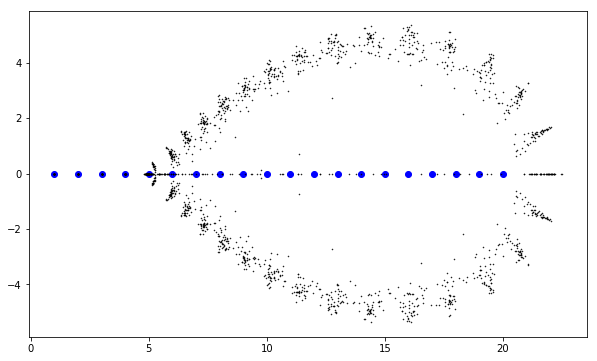

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(np.real(w_roots), np.imag(w_roots), "bo")
for i in range(100):
    r = np.random.normal(1, 1e-10, size =len(w_coeffs))
    perturbed_coeffs = w_coeffs*r
    perturbed_roots = np.sort(np.roots(np.poly1d(perturbed_coeffs)))
    plt.plot(np.real(perturbed_roots), np.imag(perturbed_roots), 'k.', ms = 1)
#absolute condition number in the infinity norm
abscon = la.norm(perturbed_roots-w_roots, np.inf)/la.norm(perturbed_coeffs-w_coeffs, np.inf)
print("Absolute condition number:",abscon)
#relative condition number in the infinity norm
relcon = abscon*la.norm(w_coeffs, np.inf)/la.norm(w_roots, np.inf)
print("Relative condition number:",relcon)

#### Calculating Eigenvalues

In [12]:
M = np.eye(2)
eigs = la.eig(M)[0]
eigs

array([ 1.+0.j,  1.+0.j])

In [13]:
perturb = np.random.normal(0, 1e-10, M.shape) + np.random.normal(0, 1e-10, M.shape)*1j
eigsp = la.eig(M+perturb)[0]
eigsp

array([ 1. -3.76979073e-11j,  1. +7.25085547e-11j])

In [14]:
#compute for the condition number
k = la.norm(eigs - eigsp)/la.norm(perturb)
k

0.79310180472551539

In [15]:
#relative condition number
k*la.norm(M)/la.norm(eigs)

0.79310180472551539

### Problem 2 (Optional).

Let us explore the condition number of the eigen- value problem.

1. (a) Write the following function.

        ￼
        def eig_condit(M):
            """
            Approximate the condition number of the eigenvalue problem at M.
            INPUT:
            M  - A 2-D NumPy array, representing a matrix.
            RETURN:
            A tuple containing approximations to the absolute and 
                relative condition numbers of the eigenvalue problem
                at M.
            """
        ￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼￼
    
    (b) Find an example of a `2 x 2` matrix with a very large condition number. (Hint: Look at matrices whose off diagonal entries are very different in magnitude.)
    
    (c) What is the order of magnitude of the condition number of a symmetric `2 x 2` matrix?
    
2. Write the following function.

```
￼￼￼￼￼￼￼￼def plot_eig_condit(x0=-100, x1=100, y0=-100, y1=100, res=10): 
    '''
    Plot the condition number of the eigenvalue problem on [x0,x1] x [y0,y1].
    Specifically, use plt.pcolormesh to plot the relative condition number of
        the eigenvalue problem at [[1,x],[y,1]] on this domain.
        ￼￼The variable `res` should be the number of sample points taken along each axis, for a total of `res'**2 points ithe plot
    '''
```

3. Call your function for `res=10, 50, 100, 200 and 400` (output for $res = 200$ is pictured below). Recall that matplotlib scales the colorbar of the output to fit the largest and smallest output values. What can you conclude about the condition number of the eigenvalue problem at a “random” `2 x 2` matrix?

In [16]:
def eig_condit(M):
    """
    Approximate the condition number of the eigenvalue problem at M.
    INPUT:
    M  - A 2-D NumPy array, representing a matrix.
    RETURN:
    A tuple containing approximations to the absolute and 
     relative condition numbers of the eigenvalue problem
     at M.
    """
    eigs = la.eig(M)[0]
    
    perturb = np.random.normal(0, 1e-10, M.shape) + np.random.normal(0, 1e-10, M.shape)*1j
    eigsp = la.eig(M+perturb)[0]
    
    abscon = la.norm(eigs - eigsp)/la.norm(perturb)
    relcon = abscon*la.norm(M)/la.norm(eigs)
    return (abscon, relcon)

In [17]:
eig_condit(M)

(0.90630759676566397, 0.90630759676566397)

In [18]:
#(b)
M = np.array([[1,-100], [-100,1]])
eig_condit(M)

(1398709987604.5835, 1398709987604.5835)

In [19]:
M = np.array([[1,-100], [100,1]])
eig_condit(M)

(0.76516493090438209, 0.76516493090438209)

In [20]:
M = np.array([[1,1], [100,1]])
eig_condit(M)

(2.4998643922481039, 17.591622635270909)

In [21]:
M = np.eye(2)
eig_condit(1*M)

(0.80782589508461922, 0.80782589508461922)

In [22]:
eig_condit(1000*M)

(0.82174705016543337, 0.82174705016543337)

In [23]:
M = np.array([[2,3],[3,2]])
eig_condit(M)

(28578079392.169399, 28578079392.169395)

In [24]:
def plot_eig_condit(x0=-100, x1=100, y0=-100, y1=100, res=10): 
    '''
    Plot the condition number of the eigenvalue problem on [x0,x1] x [y0,y1].
    Specifically, use plt.pcolormesh to plot the relative condition number of
        the eigenvalue problem at [[1,x],[y,1]] on this domain.
    The variable `res` should be the number of sample points taken along each axis,
        for a total of `res'**2 points ithe plot
    '''
    abscons = []
    relcons = []
    for x in np.linspace(x0, x1, res):
        for y in np.linspace(y0, y1, res):
            M = np.array([[1,x],[y,1]])
            abscon, relcon = eig_condit(M)
            abscons.append(abscon)
            relcons.append(relcon)
    abscons = np.reshape(abscons, (res, res))
    relcons = np.reshape(relcons, (res, res))
    plt.figure(figsize=(10,8))
    plt.pcolormesh(np.linspace(x0, x1, res), np.linspace(y0, y1, res), abscons, cmap="Greys")
    plt.colorbar()

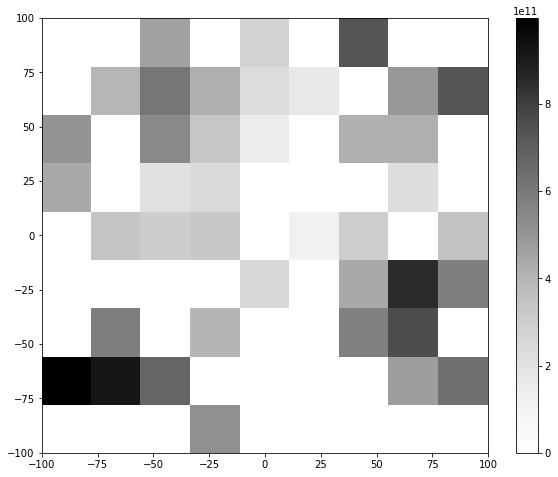

In [25]:
plot_eig_condit(res=10)

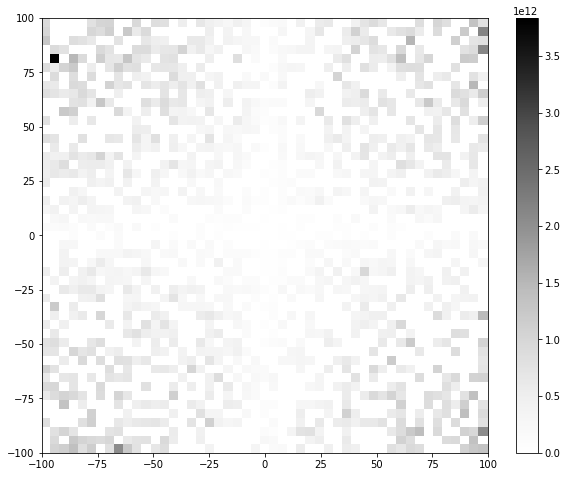

In [26]:
plot_eig_condit(res=50)

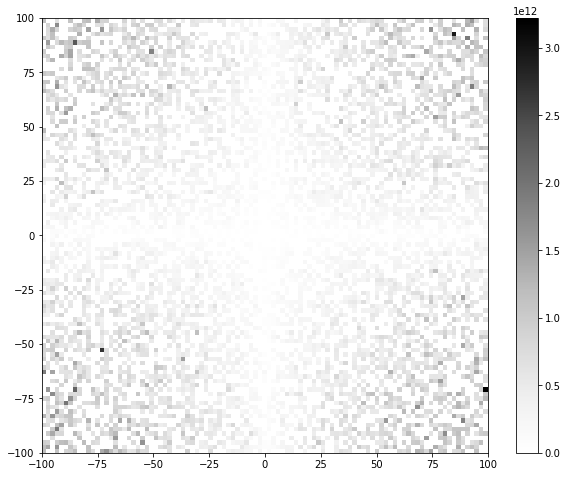

In [27]:
c = plot_eig_condit(res=100)

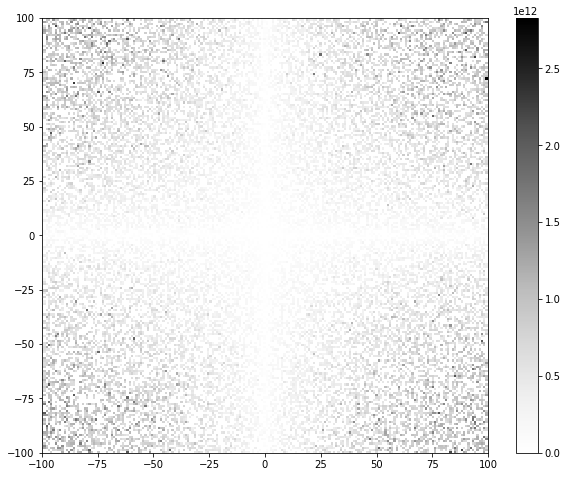

In [28]:
plot_eig_condit(res=200)

#### Stability of the Algorithm

In [29]:
roots = np.sort(np.arange(1,21))
w_coeffs = np.array([1, -210, 20615, -1256850, 53327946, -1672280820,
                    40171771630, -756111184500, 11310276995381,
                    -135585182899530, 1307535010540395,
                    -10142299865511450, 63030812099294896,
                    -311333643161390640, 1206647803780373360,
                    -3599979517947607200, 8037811822645051776,
                    -12870931245150988800, 13803759753640704000,
                    -8752948036761600000, 2432902008176640000])
computed_roots = np.sort(np.roots(np.poly1d(w_coeffs)))

In [30]:
#forward erros
fe = la.norm(roots-computed_roots)
#relative forward error
rfe = la.norm(roots-computed_roots)/la.norm(roots)

In [31]:
print("Forward Error:", fe)
print("Relative Forward Error:", rfe)

Forward Error: 0.1581635111073643
Relative Forward Error: 0.00295233305522


In [32]:
#example: subtracting 2 sqrts
a = 1e20 +1
b = 1e20
print(np.sqrt(a)-np.sqrt(b))

print(1/(np.sqrt(a)+np.sqrt(b)))

0.0
5e-11


### Problem 3. 
Let $I(n) = \int^{1}_{0} x^{n}e^{x-1}dx$. 

1. Prove that $0\leq I(n)\leq1$ for all `n`.
2. It can be shown that for $n>1$,

$$I(n) = (-1)^{n}!n + (-1)^{n+1} \frac{n!}{e}$$

where $!n$ is the `subfactorial` of $n$. Use this formula to write the following function.

        
        def integral(n):
            '''Return I(n)'''
        
    
  Hint: The subfactorial function can be imported from SymPy with the line from sympy import subfactorial.
  
3. The actual values of $I(n)$ for many values of $n$ are listed in the table below. Use your function `integral()` to compute `I(n)` for these same values of `n`, and create a table comparing the data. How can you explain what is happening?

In [33]:
import sympy as sy


In [34]:
def integral(n):
    In = (-1)**n*sy.subfactorial(n) + (-1)**(n+1)*sy.factorial(n)/sy.exp(1)
    return In.evalf()

In [35]:
ns = [int(i) for i in np.append(1, np.arange(5, 51, 5))]
actual_In = np.array([0.367879441171,
                      0.145532940573,
                      0.0838770701034,
                      0.0590175408793,
                      0.0455448840758,
                      0.0370862144237,
                      0.0312796739322,
                      0.0270462894091,
                      0.023822728669,
                      0.0212860390856,
                      0.0192377544343])
approx_In = np.array([integral(i)for i in ns])

In [36]:
df = pd.DataFrame({"n": ns,
              "Actual value of $I(n)$": actual_In,
              "Approx value of $I(n)$": approx_In})
df

,Actual value of $I(n)$,Approx value of $I(n)$,n
0,0.367879,0.367879441171442,1
1,0.145533,0.145532940573079,5
2,0.083877,0.0838770701033942,10
3,0.059018,0.0590175408792978,15
4,0.045545,0.0455448840758181,20
5,0.037086,0.0370862144237392,25
6,0.031280,0.0312796739321681,30
7,0.027046,0.0270462894090608,35
8,0.023823,0.0238227286690335,40
9,0.021286,0.0212860390856061,45


In [37]:
forerror = lambda actual, approx: np.sum(np.abs(actual-approx))
relforerror = lambda actual, approx: np.sum(np.abs(actual-approx))/np.sum(np.abs(actual))

In [38]:
forerror(df["Actual value of $I(n)$"], df["Approx value of $I(n)$"])

7.36317257166164e-13

In [39]:
relforerror(df["Actual value of $I(n)$"], df["Approx value of $I(n)$"])

8.54582426248860e-13